In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

/Users/tien/Documents/GitHub/promoter-sequence-transcription-rates/Synth_CURE_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
model = keras.saving.load_model('../../Models/CNN_5_0.keras')

In [3]:
# GCGGGAAGACAACTAGGGG is the last 19 bp, 20 bp is ITR, first bp of ITR is depends on the promoter (it is before the sticky end)
# 20bp up sequence

X =[
   'AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGGGCGGGAAGACAACTAGGGG',
   'AATACTAGAGGTCTTCCGACTTGACACTATTTCCTATTTCTCTTATAATTTGTGTTGCGGGAAGACAACTAGGGG',
   'AATACTAGAGGTCTTCCGACAAGACGCTATTTCCTATTTCTCTTATAATTTGTGTTGCGGGAAGACAACTAGGGG',
   'AATACTAGAGGTCTTCCGACCCCCTATTTCCTATTTCTGTAGTCATAGGGTGTTGCGGGAAGACAACTAGGGG',
   'AATACTAGAGGTCTTCCGACTTGACAATTAATCATCCGGCTCGTAATTTATGTGGAGCGGGAAGACAACTAGGGG',
   'AATACTAGAGGTCTTCCGACTTGACAATTAATCATCCGGCTCGTAATTTATGTGGAGCGGGAAGACAACTAGGGG',
   'ATACTAGAGGTCTTCCGACCCCGAGCGGTTTCAAAATTGTGATCTATATTTAACAAAGCGGGAAGACAACTAGGGG',
   'TACTAGAGGTCTTCCGACCCCGAGCGGTTTCAAAATTGTGATATATATTTAACAAAGCGGGAAGACAACTAGGGG',
]

In [4]:
def padded_one_hot_encode(sequence):
    mapping = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], '0': [0,0,0,0]}
    encoding = []
    for nucleotide in sequence:
         encoding += [mapping[nucleotide]]
    return encoding

upstream_padding = []
max_length = model.input_shape[1]
for seq in X:
    zeros = '0' * (max_length-len(seq))
    upstream_padding += [padded_one_hot_encode(zeros + seq)]

X = np.array(upstream_padding)
X[0]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0,

In [5]:
X.shape

(8, 150, 4)

In [6]:
X[0]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0,

In [7]:
promoters = ['pLac', 'Low', 'Medium', 'High', 'P5', 'P533A', 'OsmY', 'OsmY_C13A']
scaled_predictions = model.predict(X).flatten()
prediction_df = pd.DataFrame({'Promoter': promoters, 'Prediction': scaled_predictions})
prediction_df.head(None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


,Promoter,Prediction
0,pLac,0.525352
1,Low,0.502851
2,Medium,0.617678
3,High,0.734119
4,P5,0.527534
5,P533A,0.527534
6,OsmY,0.660137
7,OsmY_C13A,0.623739


## Getting observed RFP

In [9]:
RFP_df = pd.read_csv('../../Data/RFP/2024_07_03_Fluorescence_Data_formatted.csv')
RFP_df.head()

,Media,Promoter,Rep,ABS590,Ex550Em6630,Relative Fluorescence
0,LB,Blank,Rep1,-0.002298,3000.0,-1.305247e+06
1,LB,Blank,Rep2,0.002298,-3000.0,-1.305247e+06
2,LB,pLac,Rep1,0.890547,127596.0,1.432782e+05
3,LB,pLac,Rep2,0.898603,127909.0,1.423420e+05
4,LB,Low,Rep1,0.936451,1755972.0,1.875135e+06


In [10]:
RFP_df = RFP_df[RFP_df['Promoter'] != 'Blank'].reset_index(drop=True)
RFP_df.head()

,Media,Promoter,Rep,ABS590,Ex550Em6630,Relative Fluorescence
0,LB,pLac,Rep1,0.890547,127596.0,1.432782e+05
1,LB,pLac,Rep2,0.898603,127909.0,1.423420e+05
2,LB,Low,Rep1,0.936451,1755972.0,1.875135e+06
3,LB,Low,Rep2,0.888620,1743759.0,1.962321e+06
4,LB,Medium,Rep1,0.741436,190548.0,2.569984e+05


In [12]:
comparison_df = RFP_df
comparison_df = comparison_df.merge(prediction_df[['Promoter', 'Prediction']], on='Promoter', how='left')
comparison_df.head()

,Media,Promoter,Rep,ABS590,Ex550Em6630,Relative Fluorescence,Prediction
0,LB,pLac,Rep1,0.890547,127596.0,1.432782e+05,0.525352
1,LB,pLac,Rep2,0.898603,127909.0,1.423420e+05,0.525352
2,LB,Low,Rep1,0.936451,1755972.0,1.875135e+06,0.502851
3,LB,Low,Rep2,0.888620,1743759.0,1.962321e+06,0.502851
4,LB,Medium,Rep1,0.741436,190548.0,2.569984e+05,0.617678


In [13]:
# Drop rows with NaN values
comparison_df.dropna(inplace=True)
comparison_df.head()

,Media,Promoter,Rep,ABS590,Ex550Em6630,Relative Fluorescence,Prediction
0,LB,pLac,Rep1,0.890547,127596.0,1.432782e+05,0.525352
1,LB,pLac,Rep2,0.898603,127909.0,1.423420e+05,0.525352
2,LB,Low,Rep1,0.936451,1755972.0,1.875135e+06,0.502851
3,LB,Low,Rep2,0.888620,1743759.0,1.962321e+06,0.502851
4,LB,Medium,Rep1,0.741436,190548.0,2.569984e+05,0.617678


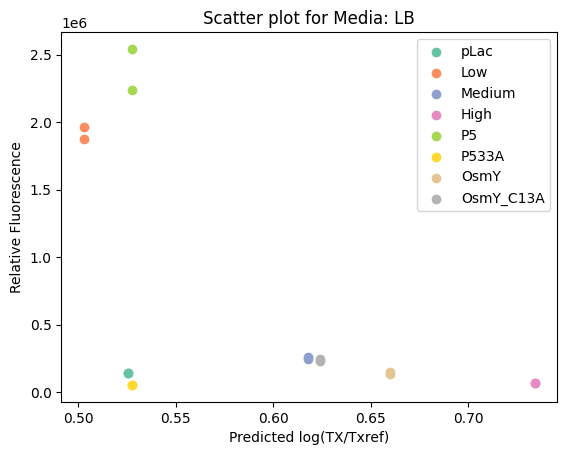

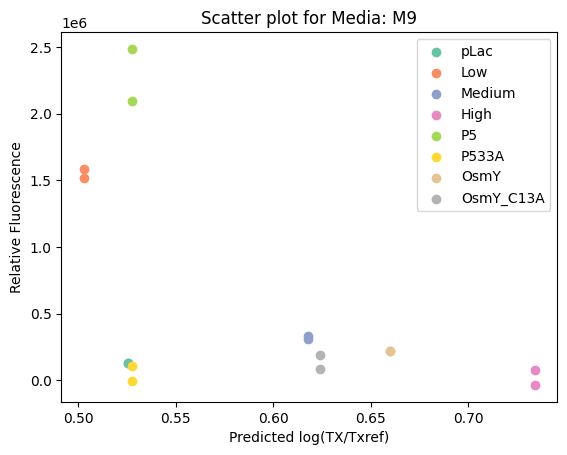

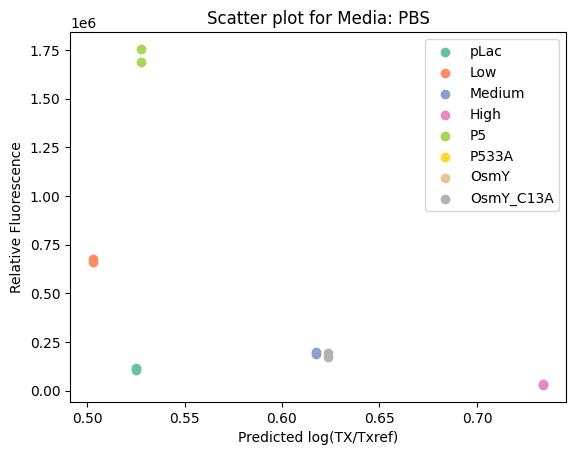

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


unique_media = comparison_df['Media'].unique()
unique_promoters = comparison_df['Promoter'].unique()

colors = plt.cm.Set2(np.linspace(0, 1, len(unique_promoters)))
color_map = {promoter: colors[i] for i, promoter in enumerate(unique_promoters)}

for media in unique_media:
    subset_df_media = comparison_df[comparison_df['Media'] == media]

    plt.figure()

    for i, promoter in enumerate(unique_promoters):
        promoter_subset_df = subset_df_media[subset_df_media['Promoter'] == promoter]
        color = color_map[promoter]
        plt.scatter(promoter_subset_df['Prediction'], promoter_subset_df['Relative Fluorescence'], c=[color], label=promoter)

    plt.xlabel('Predicted log(TX/Txref)')
    plt.ylabel('Relative Fluorescence')
    plt.title(f'Scatter plot for Media: {media}')
    plt.legend()

plt.show()
